In [2]:
# Loading libraries
import os
import wot
import bz2
import gzip
import random
import pickle
import numpy as np
import scanpy as sc
import pandas as pd
# import seaborn as sns
import scipy.stats as stat
import matplotlib.pyplot as plt

from tqdm import tqdm
from time import time
from glob import glob
from matplotlib.lines import Line2D


In [3]:
# Paths
project_dir   = "/path/to"
raw_dir       = os.path.join(project_dir, "raw")
processed_dir = os.path.join(project_dir, "processed")
volcano_dir   = os.path.join(project_dir,"processed","volcano")

In [1]:
# Map to get full cell names
celltype_map = {
    "BP":"B-cell progenitor",
    "EryP":"Erythrocyte progenitor",
    "HSC":"Hematopoietic stem cell",
    "MasP":"Mast cell progenitor",
    "MkP":"Megakaryocyte progenitor",
    "MoP":"Monocyte progenitor",
    "NeuP":"Neutrophil progenitor",
}

# Constructing AnnData (Scanpy) object

In [61]:
metadata = pd.read_csv(os.path.join(raw_dir, "metadata.csv"))
metadata = metadata[metadata["technology"] == "citeseq"]

cite_rna_df    = pd.read_hdf(os.path.join(raw_dir,"train_cite_inputs.h5"))
cite_rna_adata = sc.AnnData(cite_rna_df)
sc.pp.pca(cite_rna_adata, n_comps=30)
sc.pp.neighbors(cite_rna_adata, n_neighbors=10)
# sc.tl.leiden(adata, key_added="leiden")

day_dict, donor_dict, celltype_dict = {}, {}, {}
for idx,row in metadata.iterrows():
    cell_id                = row[  'cell_id']
    day_dict[     cell_id] = row[      'day']
    donor_dict[   cell_id] = row[    'donor']
    celltype_dict[cell_id] = row['cell_type']
    
cite_rna_adata.obs[      'day'] = [day_dict[     cell_id] for cell_id in cite_rna_adata.obs_names]
cite_rna_adata.obs[    'donor'] = [donor_dict[   cell_id] for cell_id in cite_rna_adata.obs_names]
cite_rna_adata.obs['cell_type'] = [celltype_dict[cell_id] for cell_id in cite_rna_adata.obs_names]

del metadata, cite_rna_df, day_dict, donor_dict, celltype_dict

# Splitting RNA expression dataset by day and writing in .csv format

In [ ]:
# for day in np.unique(cite_rna_adata.obs.day):
#     cite_rna_subset_adata = cite_rna_adata[cite_rna_adata.obs.day == day]
#     print(cite_rna_subset_adata)
    
#     outname = f"cite_rna_day{day}_full.csv"
#     outpath = os.path.join(processed_dir,outname)
#     if not os.path.exists(outpath):
#         cite_rna_subset_df = pd.DataFrame(
#             cite_rna_subset_adata.X,
#             index=cite_rna_subset_adata.obs_names,
#             columns=cite_rna_subset_adata.var_names
#         )
#         cite_rna_subset_df.to_csv(os.path.join(processed_dir,outname))

#     outname = f"cite_rna_day{day}_pca.csv"
#     outpath = os.path.join(processed_dir,outname)
#     if not os.path.exists(outpath):
#         cite_rna_subset_df = pd.DataFrame(
#             cite_rna_subset_adata.obsm["X_pca"],
#             index=cite_rna_subset_adata.obs_names,
#             columns=["pc"+str(i+1) for i in range(0, cite_rna_subset_adata.obsm["X_pca"].shape[1])]
#         )
#         cite_rna_subset_df.to_csv(os.path.join(processed_dir,outname))


In [ ]:
# Writing it to compressed .csv format
# cite_rna_df = pd.read_hdf(os.path.join(raw_dir,"train_cite_inputs.h5"))
# outpath = os.path.join(processed_dir,"train_cite_inputs.csv.gz")
# cite_rna_df.to_csv(outpath,compression="gzip")

# Testspace for scanpy plots

In [ ]:
sc.tl.umap(cite_rna_adata)
sc.pl.umap(cite_rna_adata, color="cell_type")

In [ ]:
sc.tl.tsne(cite_rna_adata)
sc.pl.tsne(cite_rna_adata, color="cell_type")

In [ ]:
sc.tl.pca(cite_rna_adata)
sc.pl.pca(cite_rna_adata, color="cell_type")

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(20,6))
# cite_rna_subset_adata = cite_rna_adata[(cite_rna_adata.obs.day == 4) & (cite_rna_adata.obs.cell_type == "HSC")]
cite_rna_subset_adata = cite_rna_adata[(cite_rna_adata.obs.day == 4)]
sc.tl.pca(cite_rna_subset_adata)
sc.tl.tsne(cite_rna_subset_adata)
sc.tl.umap(cite_rna_subset_adata)
sc.pl.pca( cite_rna_subset_adata, color="cell_type",legend_loc=None, ax=axs[0], show=False)
sc.pl.tsne(cite_rna_subset_adata, color="cell_type",legend_loc=None, ax=axs[1], show=False)
sc.pl.umap(cite_rna_subset_adata, color="cell_type", ax=axs[2], show=False)

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(20,6))
# cite_rna_subset_adata = cite_rna_adata[(cite_rna_adata.obs.day == 4) & (cite_rna_adata.obs.cell_type == "HSC")]
cite_rna_subset_adata = cite_rna_adata[(cite_rna_adata.obs.day == 4)]
sc.tl.pca(cite_rna_subset_adata)
sc.pl.pca( cite_rna_subset_adata, color="cell_type",legend_loc=None, ax=axs[1], show=False)
plt.show()

# Comparing PCA, t-SNE, and UMAP

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(24,15))
sc.tl.pca(cite_rna_adata)
sc.tl.tsne(cite_rna_adata)
sc.tl.umap(cite_rna_adata)
for i,day in enumerate(np.unique(cite_rna_adata.obs.day)):
    cite_rna_subset_adata = cite_rna_adata[cite_rna_adata.obs.day == day]
    if i == 0:
        sc.pl.pca(cite_rna_subset_adata, color='cell_type',show=False,size=30,ax=axes[i,0],legend_loc=None,title="PCA")
        sc.pl.tsne(cite_rna_subset_adata,color='cell_type',show=False,size=30,ax=axes[i,1],legend_loc=None,title="t-SNE")
        sc.pl.umap(cite_rna_subset_adata,color='cell_type',show=False,size=30,ax=axes[i,2],legend_loc=None,title="UMAP")
    elif i == 1:
        cite_rna_subset_adata.obs["cell_type"] = [celltype_map[celltype] for celltype in cite_rna_subset_adata.obs["cell_type"]]
        sc.pl.pca(cite_rna_subset_adata, color='cell_type',show=False,size=30,ax=axes[i,0],legend_loc=None,title="")
        sc.pl.tsne(cite_rna_subset_adata,color='cell_type',show=False,size=30,ax=axes[i,1],legend_loc=None,title="")
        sc.pl.umap(cite_rna_subset_adata,color='cell_type',show=False,size=30,ax=axes[i,2],legend_fontsize=14,title="")
    else:
        sc.pl.pca(cite_rna_subset_adata, color='cell_type',show=False,size=30,ax=axes[i,0],legend_loc=None,title="")
        sc.pl.tsne(cite_rna_subset_adata,color='cell_type',show=False,size=30,ax=axes[i,1],legend_loc=None,title="")
        sc.pl.umap(cite_rna_subset_adata,color='cell_type',show=False,size=30,ax=axes[i,2],legend_loc=None,title="")
        
row_names = [f"Day {day}" for day in np.unique(cite_rna_adata.obs.day)]
pad = 5
for ax,row in zip(axes[:,0],row_names):
    ax.annotate(
        row,
        xy=(0,0.5),
        xytext=(-ax.yaxis.labelpad-pad,0),
        xycoords=ax.yaxis.label,
        textcoords='offset points',
        size='large',
        ha='right',
        va='center'
    )
fig.tight_layout()
fig.subplots_adjust(left=0.20, top=0.95)
plt.savefig(
    '/path/to/figs/cs547/DR_comparison_by_day.png',
    dpi=300,
    transparent=True
)

# Dimensionality reduction decomposed by cell type and day

In [ ]:
# Optionally, call to use full cell type names instead of abbreviation
cite_rna_adata.obs.cell_type = [celltype_map[celltype] for celltype in cite_rna_adata.obs.cell_type]

## UMAP: with superimposition of cell type with respect to background population (i.e., all other cell types)

In [ ]:
n = len(np.unique(cite_rna_adata.obs.cell_type))
m = len(np.unique(cite_rna_adata.obs.day))

sc.tl.umap(cite_rna_adata)
fig, axes = plt.subplots(n,m, figsize=(12,18))

for i,celltype in enumerate(np.unique(cite_rna_adata.obs.cell_type)):
    for j,day in enumerate(np.unique(cite_rna_adata.obs.day)):
        cite_rna_subset_adata = cite_rna_adata[cite_rna_adata.obs.day == day]
        title = f"Day {day}" if i == 0 else ""
        sc.pl.umap(
            cite_rna_subset_adata,
            color="cell_type",
            groups=[celltype],
            show=False,
            add_outline=True,
            frameon=False,
            size=30,
            legend_loc='right margin' if j == m-1 else None,
            na_in_legend=False,
            ax=axes[i,j],
            title=title
        )

fig.tight_layout()
fig.subplots_adjust(left=0.20, top=0.95)
plt.savefig(
    '/path/to/figs/cs547/UMAP_celltype_day.png',
    dpi=300,
    transparent=True
)

## t-SNE: : with superimposition of cell type with respect to background population (i.e., all other cell types)

In [ ]:
n = len(np.unique(cite_rna_adata.obs.cell_type))
m = len(np.unique(cite_rna_adata.obs.day))

sc.tl.tsne(cite_rna_adata)
fig, axes = plt.subplots(n,m, figsize=(12,18))

for i,celltype in enumerate(np.unique(cite_rna_adata.obs.cell_type)):
    for j,day in enumerate(np.unique(cite_rna_adata.obs.day)):
        cite_rna_subset_adata = cite_rna_adata[cite_rna_adata.obs.day == day]
        title = f"Day {day}" if i == 0 else ""
        sc.pl.tsne(
            cite_rna_subset_adata,
            color="cell_type",
            groups=[celltype],
            show=False,
            add_outline=True,
            frameon=False,
            size=30,
            legend_loc='right margin' if j == m-1 else None,
            na_in_legend=False,
            ax=axes[i,j],
            title=title
        )

fig.tight_layout()
fig.subplots_adjust(left=0.20, top=0.95)
plt.savefig(
    '/path/to/figs/cs547/tSNE_celltype_day.png',
    dpi=300,
    transparent=True
)

## PCA: : with superimposition of cell type with respect to background population (i.e., all other cell types)

In [ ]:
n = len(np.unique(cite_rna_adata.obs.cell_type))
m = len(np.unique(cite_rna_adata.obs.day))

sc.tl.pca(cite_rna_adata)
fig, axes = plt.subplots(n,m, figsize=(12,18))

for i,celltype in enumerate(np.unique(cite_rna_adata.obs.cell_type)):
    for j,day in enumerate(np.unique(cite_rna_adata.obs.day)):
        cite_rna_subset_adata = cite_rna_adata[cite_rna_adata.obs.day == day]
        title = f"Day {day}" if i == 0 else ""
        sc.pl.pca(
            cite_rna_subset_adata,
            color="cell_type",
            groups=[celltype],
            show=False,
            add_outline=True,
            frameon=False,
            size=30,
            legend_loc='right margin' if j == m-1 else None,
            na_in_legend=False,
            ax=axes[i,j],
            title=title
        )

fig.tight_layout()
fig.subplots_adjust(left=0.20, top=0.95)
plt.savefig(
    '/path/to/figs/cs547/PCA_celltype_day.png',
    dpi=300,
    transparent=True
)

# Heatmap of PC components

Downstream analyses can optionally be called upon a dataset that has undergone dimensionality reduction with PCA. This visual encoding depicts the variation with respect to gene expression for the first 30 principal components, which basically shows how they are able to capture most of a variability in only a handful.

In [ ]:
pca_df = pd.DataFrame(
    cite_rna_adata.obsm["X_pca"],
    index=cite_rna_adata.obs_names,
    columns=["pc"+str(i+1) for i in range(0,cite_rna_adata.obsm["X_pca"].shape[1])]
)

cite_rna_pca_adata = sc.AnnData(pca_df)
cite_rna_pca_adata.obs[      'day'] = cite_rna_adata.obs[      "day"]
cite_rna_pca_adata.obs[    'donor'] = cite_rna_adata.obs[    "donor"]
cite_rna_pca_adata.obs['Assigned cell type'] = cite_rna_adata.obs["cell_type"]

sc.pl.heatmap(
    cite_rna_pca_adata,
    groupby="Assigned cell type",
    var_names=cite_rna_pca_adata.var_names,
    cmap="inferno",
    figsize=(8,6),
    save="pca_rna_expression_by_celltype.pdf"
)

# Rank genes by cell type and plot as heatmap (by day)

In [ ]:
cite_rna_adata.obs["Cell type"] = cite_rna_adata.obs.cell_type
for i,day in enumerate(np.unique(cite_rna_adata.obs.day)):
    subset_adata = cite_rna_adata[cite_rna_adata.obs.day == day]
    sc.tl.rank_genes_groups(subset_adata, groupby='Cell type',method="t-test_overestim_var")
    sc.pl.rank_genes_groups_heatmap(
        subset_adata,
        n_genes=3,
        dendrogram=False,
        show_gene_labels=True,
        # figsize=(6,4),
        cmap='BuPu',
        values_to_plot='logfoldchanges',
        show=True,
        save=f"rna_rank_genes_groups_heatmap_day{day}.pdf"
    )

### Tracksplot

Does not capture much signal in the context of this dataset (due to high expression levels for selected genes)

In [ ]:
cite_rna_adata.obs["Cell type"] = cite_rna_adata.obs.cell_type
for i,day in enumerate(np.unique(cite_rna_adata.obs.day)):
    subset_adata = cite_rna_adata[cite_rna_adata.obs.day == day]
    sc.tl.rank_genes_groups(subset_adata, groupby='Cell type',method="t-test_overestim_var")
    sc.pl.rank_genes_groups_tracksplot(
        subset_adata,
        n_genes=3,
        dendrogram=False,
        show_gene_labels=True,
        figsize=(6,4),
        cmap='BuPu',
        values_to_plot='logfoldchanges',
        show=True,
        swap_axes=True
        # save=f"rna_rank_genes_groups_heatmap_day{day}.pdf"
    )
    
# sc.pl.rank_genes_groups_tracksplot(
#     subset_adata,
#     figsize=(14,8),
#     min_logfoldchange=3,
#     n_genes=3, # 3
#     # swap_axes=True,
#     show_gene_labels=False,
#         save=True
# )

### Dotplot

Aggregates cells according to cell type for the top3 ranked cells. This aggregation step helps to alleviate some of the density that heatmaps provide, and as a result it may be easier to see trends at the cell type level

In [ ]:
# sc.tl.rank_genes_groups(pbmc, groupby='clusters', method='wilcoxon')
cite_rna_adata.obs["Cell type"] = cite_rna_adata.obs.cell_type
for i,day in enumerate(np.unique(cite_rna_adata.obs.day)):
    subset_adata = cite_rna_adata[cite_rna_adata.obs.day == day]
    sc.tl.rank_genes_groups(subset_adata, groupby='Cell type', method="t-test_overestim_var")
    sc.pl.rank_genes_groups_dotplot(
        subset_adata,
        n_genes=3,
        dendrogram=False,
        cmap='BuPu',
        figsize=(8,4),
        values_to_plot='logfoldchanges',
        show=True,
        vmin=-6,
        vmax=6,
        save=f"rna_rank_genes_groups_day{day}.pdf"
    )

### Stacked violin

This idiom captures distributional information for the different cell types. Particularly effective in observing whether a population is skewed.

In [ ]:
# sc.tl.rank_genes_groups(pbmc, groupby='clusters', method='wilcoxon')
cite_rna_adata.obs["Cell type"] = cite_rna_adata.obs.cell_type
for i,day in enumerate(np.unique(cite_rna_adata.obs.day)):
    subset_adata = cite_rna_adata[cite_rna_adata.obs.day == day]
    sc.tl.rank_genes_groups(subset_adata, groupby='Cell type', method="t-test_overestim_var")
    sc.pl.rank_genes_groups_stacked_violin(
        subset_adata,
        n_genes=3,
        dendrogram=False,
        cmap='BuPu',
        figsize=(8,6),
        values_to_plot='logfoldchanges',
        show=True,
        vmin=-6,
        vmax=6,
        save=f"rna_rank_genes_groups_day{day}.pdf"
    )

# Volcano plot

* X-axis represents the log2 fold changes between two conditions
* Y-axis represents the fold change p value in terms of negative log10

Visual method used to select for cell type specific marker genes that are distinct from other cell types.

In [14]:
# Some parameters -- electing to be quite strict in that we only select genes with a foldchange above 5 and a Bonferroni-corrected -log10 (p-value)
PSEUDOCOUNT=0.0001
FOLD_THRESHOLD = 5
PVALUE_THRESHOLD = 15

In [ ]:
# Subsetting rna expression by day, and then further splitting it by one cell type versus the rest
day=4
cite_rna_subset_adata = cite_rna_adata[cite_rna_adata.obs.day == day]
for celltype in np.unique(cite_rna_subset_adata.obs.cell_type):
    celltype_adata = cite_rna_subset_adata[cite_rna_subset_adata.obs.cell_type == celltype]
    rest_adata     = cite_rna_subset_adata[cite_rna_subset_adata.obs.cell_type != celltype]
    
    print(celltype_adata)
    print(rest_adata)
    
    break

In [ ]:
# For the cell type of interest, only consider columns (genes) that have at least one non-zero value
# That is, filter genes that are all non-zero
n,m = celltype_adata.X.shape

start = time()
nonzero_indices = [sum(celltype_adata.X[:,j]) > 0 for j in range(m)]
end = time()
print(end-start)

# Filtering split datasets to only include non-zero columns, and add pseudocount to avoid divide-by-zero errors
celltype_subset_adata = celltype_adata[:,nonzero_indices]
rest_subset_adata     = rest_adata[:,nonzero_indices]

celltype_subset_adata.X += PSEUDOCOUNT
rest_subset_adata.X += PSEUDOCOUNT

# Calculate fold-change
celltype_mean_values = np.mean(celltype_subset_adata.X,axis=0)
rest_mean_values     = np.mean(rest_subset_adata.X,axis=0)
foldchanges = np.log2(np.divide(celltype_mean_values,rest_mean_values))

# Perform t-test for each gene, comparing rna counts for cell type of interest versus rest of cell population
ttest_results = stat.ttest_ind(
    celltype_subset_adata.X,
    rest_subset_adata.X,
    axis=0
)
# Bonferroni correction since we are computing p-values for many genes per cell type
transformed_pvalues = -1*np.log10(len(celltype_mean_values)*np.array(pvalues))

## Plotting processed data for volcano vis idiom 

In [ ]:
# fig, axes = plt.subplots(3,7, figsize=(28,10))
# volcano_dir = "/path/to/processed/volcano"

# FOLD_THRESHOLD = 5
# PVALUE_THRESHOLD = 15

# for i,day in enumerate([2,3,4]):
#     for j,celltype in enumerate(np.unique(cite_rna_adata.obs.cell_type)):
#         volcano_path = f"{volcano_dir}/cite_rna_day{day}_{celltype}_volcano_processing.txt.gz"
#         if not os.path.exists(volcano_path): continue
#         with gzip.open(volcano_path,"rt") as handle:
#             df = pd.read_csv(handle)
        
#         cols = []
#         processed_foldchange = []
#         processed_bpvals = []
#         for idx,row in df.iterrows():
#             fold = float(row["foldchange"])
#             pval = float(row["bonferroni_pval"])
#             if pval == np.inf: continue
#             if fold > FOLD_THRESHOLD and pval > PVALUE_THRESHOLD:
#                 cols.append("blue")
#             elif fold < -FOLD_THRESHOLD and pval > PVALUE_THRESHOLD:
#                 cols.append("orange")
#             else:
#                 cols.append("lightgray")
#             processed_foldchange.append(fold)
#             processed_bpvals.append(pval)
#         # axes[i,j].scatter(df["foldchange"], df["bonferroni_pval"], c=cols)
#         axes[i,j].scatter(processed_foldchange, processed_bpvals, c=cols)
#         axes[i,j].set_xlim([-12,12])
#         axes[i,j].set_ylim([-5,50])
#         if i == 0:
#             axes[i,j].set_title(f"{celltype} ({len(cols)} genes)")
#         if j == 0 and i == 1:
#             axes[i,j].set_ylabel("-log10 p-value")
#         if i == 2 and j == 3:
#             axes[i,j].set_xlabel("Foldchange")
#         if i == 1 and j == 0:
#             legend_elements = [
#                 Line2D([0],[0],marker='o',color="white",label='Scatter',markerfacecolor="orange",markersize=10),
#                 Line2D([0],[0],marker='o',color='white',label='Scatter',markerfacecolor='lightgray',markersize=10),
#                 Line2D([0],[0],marker='o',color='white',label='Scatter',markerfacecolor='blue',markersize=10)
#             ]
#             axes[i,j].legend(legend_elements,["Underexpressed","Not significantly different","Overexpressed"],loc='upper left')

# for ax in fig.get_axes():
#     ax.label_outer()

# row_names = [f"Day {day}" for day in np.unique(cite_rna_adata.obs.day)]
# pad = 5
# for ax,row in zip(axes[:,0],row_names):
#     ax.annotate(
#         row,
#         xy=(0,0.5),
#         xytext=(-ax.yaxis.labelpad-pad,0),
#         xycoords=ax.yaxis.label,
#         textcoords='offset points',
#         size='large',
#         ha='right',
#         va='center'
#     )
# fig.tight_layout()
# fig.subplots_adjust(left=0.25, top=0.95)
# plt.savefig(
#     '/path/to/figs/cs547/volcano_celltype_day.png',
#     dpi=300,
#     transparent=True
# )

## Constructing cumulative_filtered_df

All cell types identified by Volcano plot

In [ ]:
cumulative_filtered_dfs = []
for i,celltype in enumerate(np.unique(cite_rna_adata.obs.cell_type)):
    selection_dict = {
        "cell_type":      [],
        "day":            [],
        "gene":           [],
        "bonferroni_pval":[],
        "foldchange":     [],
        "direction":      [],
        "significant":    [],
        "colors":         []
    }
    for j,day in enumerate(np.unique(cite_rna_adata.obs.day)):
        volcano_path = f"{volcano_dir}/cite_rna_day{day}_{celltype}_volcano_processing.txt.gz"
        with gzip.open(volcano_path,"rt") as handle:
            df = pd.read_csv(handle)
        
        for idx,row in df.iterrows():
            gene  = row["gene"]
            fold  = float(row["foldchange"])
            bpval = float(row["bonferroni_pval"])
            if bpval == np.inf: continue
            if fold > FOLD_THRESHOLD and bpval > PVALUE_THRESHOLD:
                selection_dict["cell_type"].append(celltype)
                selection_dict["day"].append(day)
                selection_dict["gene"].append(gene)
                selection_dict["bonferroni_pval"].append(bpval)
                selection_dict["foldchange"].append(fold)
                selection_dict["direction"].append("over")
                selection_dict["significant"].append(True)
                selection_dict["colors"].append("blue")
            elif fold < -FOLD_THRESHOLD and bpval > PVALUE_THRESHOLD:
                selection_dict["cell_type"].append(celltype)
                selection_dict["day"].append(day)
                selection_dict["gene"].append(gene)
                selection_dict["bonferroni_pval"].append(bpval)
                selection_dict["foldchange"].append(fold)
                selection_dict["direction"].append("under")
                selection_dict["significant"].append(True)
                selection_dict["colors"].append("orange")
            else:
                selection_dict["cell_type"].append(celltype)
                selection_dict["day"].append(day)
                selection_dict["gene"].append(gene)
                selection_dict["bonferroni_pval"].append(bpval)
                selection_dict["foldchange"].append(fold)
                selection_dict["direction"].append("NA")
                selection_dict["significant"].append(False)
                selection_dict["colors"].append("lightgray")
          
    selection_df = pd.DataFrame(selection_dict)
    selection_df["scaled_bpval"] = selection_df["bonferroni_pval"]+np.abs(np.min(selection_df["bonferroni_pval"]))
    selection_df["scaled_bpval"] = (selection_df["scaled_bpval"]-np.min(selection_df["scaled_bpval"]))/np.ptp(selection_df["scaled_bpval"])
    selection_df["scaled_fold"]  = np.abs(selection_df["foldchange"])
    selection_df["scaled_fold"]  = (selection_df["scaled_fold"]-np.min(selection_df["scaled_fold"]))/np.ptp(selection_df["scaled_fold"])
    selection_df["score"]        = np.multiply(selection_df["scaled_bpval"],selection_df["scaled_fold"])
    selection_df                 = selection_df[selection_df["significant"]]

    filtered_dfs = [] 
    for grouping in selection_df.sort_values(["score"],ascending=False).groupby("day"):
        filtered_dfs.append(grouping[1].iloc[:3,:])
    filtered_df = pd.concat(filtered_dfs).drop(columns=["significant"])
        
    cumulative_filtered_dfs.append(filtered_df)

cumulative_filtered_df = pd.concat(cumulative_filtered_dfs)
# cumulative_filtered_df

In [38]:
# Test write/load
outpath="/path/to/processed/volcano/volcano_enriched_genes.csv.gz"
cumulative_filtered_df.to_csv(outpath,index=False,compression="gzip")
test_laod = pd.read_csv(outpath,compression="gzip")
test_laod.head()

# Volcano plot, with annotations of selected genes for each celltype

In [ ]:
fig, axes = plt.subplots(3,7, figsize=(28,10))
volcano_dir = "/path/to/processed/volcano"

FOLD_THRESHOLD = 5
PVALUE_THRESHOLD = 15

for i,day in enumerate([2,3,4]):
    for j,celltype in enumerate(np.unique(cite_rna_adata.obs.cell_type)):
        volcano_path = f"{volcano_dir}/cite_rna_day{day}_{celltype}_volcano_processing.txt.gz"
        if not os.path.exists(volcano_path): continue
        with gzip.open(volcano_path,"rt") as handle:
            df = pd.read_csv(handle)
        
        point_colors         = []
        processed_gene_list  = []
        processed_foldchange = []
        processed_bpvals     = []
        for idx,row in df.iterrows():
            fold = float(row["foldchange"])
            pval = float(row["bonferroni_pval"])
            if pval == np.inf: continue
            if fold > FOLD_THRESHOLD and pval > PVALUE_THRESHOLD:
                point_colors.append("blue")
            elif fold < -FOLD_THRESHOLD and pval > PVALUE_THRESHOLD:
                point_colors.append("orange")
            else:
                point_colors.append("lightgray")
            processed_foldchange.append(fold)
            processed_bpvals.append(pval)
        # axes[i,j].scatter(df["foldchange"], df["bonferroni_pval"], c=cols)
        axes[i,j].scatter(processed_foldchange, processed_bpvals, c=point_colors,alpha=0.5)
        
        selected_subset_df = cumulative_filtered_df[(cumulative_filtered_df["cell_type"] == celltype) & (cumulative_filtered_df["day"] == day)]
        for k,row in selected_subset_df.iterrows():
            gene_name = row["gene"].split("_")[1]
            axes[i,j].annotate(gene_name,(row["foldchange"]-4,row["bonferroni_pval"]+2))
        axes[i,j].scatter(selected_subset_df["foldchange"], selected_subset_df["bonferroni_pval"], c=selected_subset_df["colors"],s=100)
        
        axes[i,j].set_xlim([-12,12])
        axes[i,j].set_ylim([-5,50])
        if i == 0:
            axes[i,j].set_title(f"{celltype} ({len(point_colors)} genes)")
        if j == 0 and i == 1:
            axes[i,j].set_ylabel("-log10 p-value")
        if i == 2 and j == 3:
            axes[i,j].set_xlabel("Foldchange")
        if i == 1 and j == 0:
            legend_elements = [
                Line2D([0],[0],marker='o',color="white",label='Scatter',markerfacecolor="orange",markersize=10),
                Line2D([0],[0],marker='o',color='white',label='Scatter',markerfacecolor='lightgray',markersize=10),
                Line2D([0],[0],marker='o',color='white',label='Scatter',markerfacecolor='blue',markersize=10)
            ]
            axes[i,j].legend(legend_elements,["Underexpressed","Not significantly different","Overexpressed"],loc='upper left')

for ax in fig.get_axes():
    ax.label_outer()

row_names = [f"Day {day}" for day in np.unique(cite_rna_adata.obs.day)]
pad = 5
for ax,row in zip(axes[:,0],row_names):
    ax.annotate(
        row,
        xy=(0,0.5),
        xytext=(-ax.yaxis.labelpad-pad,0),
        xycoords=ax.yaxis.label,
        textcoords='offset points',
        size='large',
        ha='right',
        va='center'
    )
fig.tight_layout()
fig.subplots_adjust(left=0.25, top=0.95)
plt.savefig(
    '/path/to/figs/cs547/volcano_celltype_day.png',
    dpi=300,
    transparent=True
)

## Volcano plot, selected genes for each celltype (display table)

In [ ]:

# cumulative_filtered_dfs = []
# for i,celltype in enumerate(np.unique(cite_rna_adata.obs.cell_type)):
#     selection_dict = {
#         "cell_type":      [],
#         "day":            [],
#         "gene":           [],
#         "bonferroni_pval":[],
#         "foldchange":     [],
#         "direction":      [],
#         "significant":    [],
#         "colors":         []
#     }
#     for j,day in enumerate(np.unique(cite_rna_adata.obs.day)):
#         volcano_path = f"{volcano_dir}/cite_rna_day{day}_{celltype}_volcano_processing.txt.gz"
#         with gzip.open(volcano_path,"rt") as handle:
#             df = pd.read_csv(handle)
        
#         for idx,row in df.iterrows():
#             gene  = row["gene"]
#             fold  = float(row["foldchange"])
#             bpval = float(row["bonferroni_pval"])
#             if bpval == np.inf: continue
#             if fold > FOLD_THRESHOLD and bpval > PVALUE_THRESHOLD:
#                 selection_dict["cell_type"].append(celltype)
#                 selection_dict["day"].append(day)
#                 selection_dict["gene"].append(gene)
#                 selection_dict["bonferroni_pval"].append(bpval)
#                 selection_dict["foldchange"].append(fold)
#                 selection_dict["direction"].append("over")
#                 selection_dict["significant"].append(True)
#                 selection_dict["colors"].append("blue")
#             elif fold < -FOLD_THRESHOLD and bpval > PVALUE_THRESHOLD:
#                 selection_dict["cell_type"].append(celltype)
#                 selection_dict["day"].append(day)
#                 selection_dict["gene"].append(gene)
#                 selection_dict["bonferroni_pval"].append(bpval)
#                 selection_dict["foldchange"].append(fold)
#                 selection_dict["direction"].append("under")
#                 selection_dict["significant"].append(True)
#                 selection_dict["colors"].append("orange")
#             else:
#                 selection_dict["cell_type"].append(celltype)
#                 selection_dict["day"].append(day)
#                 selection_dict["gene"].append(gene)
#                 selection_dict["bonferroni_pval"].append(bpval)
#                 selection_dict["foldchange"].append(fold)
#                 selection_dict["direction"].append("NA")
#                 selection_dict["significant"].append(False)
#                 selection_dict["colors"].append("lightgray")
          
#     selection_df = pd.DataFrame(selection_dict)
#     selection_df["scaled_bpval"] = selection_df["bonferroni_pval"]+np.abs(np.min(selection_df["bonferroni_pval"]))
#     selection_df["scaled_bpval"] = (selection_df["scaled_bpval"]-np.min(selection_df["scaled_bpval"]))/np.ptp(selection_df["scaled_bpval"])
#     selection_df["scaled_fold"]  = np.abs(selection_df["foldchange"])
#     selection_df["scaled_fold"]  = (selection_df["scaled_fold"]-np.min(selection_df["scaled_fold"]))/np.ptp(selection_df["scaled_fold"])
#     selection_df["score"]        = np.multiply(selection_df["scaled_bpval"],selection_df["scaled_fold"])
#     selection_df                 = selection_df[selection_df["significant"]]

#     filtered_dfs = [] 
#     for grouping in selection_df.sort_values(["score"],ascending=False).groupby("day"):
#         filtered_dfs.append(grouping[1].iloc[:3,:])
#     filtered_df = pd.concat(filtered_dfs).drop(columns=["significant","colors"])
#     filtered_df["gene_name"] = [name.split("_")[1] for name in filtered_df["gene"]]
#     filtered_df["expression"] = ["increased" if d == "over" else "decreased" for d in filtered_df["direction"]]
#     filtered_df = filtered_df.drop(columns=["gene","scaled_bpval","scaled_fold","direction"])
#     display(filtered_df)

# For selected genes with respect to each cell type, violin plot to compare distributions

In [16]:
cumulative_filtered_df.head()

,cell_type,day,gene,bonferroni_pval,foldchange,direction,colors,scaled_bpval,scaled_fold,score
13268,BP,3,ENSG00000272440_AC080013.6,31.032776,6.375110,over,blue,0.794385,0.922877,0.733120
14650,BP,3,ENSG00000138135_CH25H,24.762657,5.782196,over,blue,0.652692,0.837045,0.546332
19836,BP,3,ENSG00000183780_SLC35F3,22.355488,5.887609,over,blue,0.598294,0.852305,0.509929
28721,BP,4,ENSG00000269404_SPIB,34.096272,6.097673,over,blue,0.863614,0.882715,0.762325
25651,BP,4,ENSG00000232613_LINC02576,25.312550,6.892991,over,blue,0.665118,0.997847,0.663687


/home/brett/envs/miniconda3/envs/py39R41/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/brett/envs/miniconda3/envs/py39R41/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


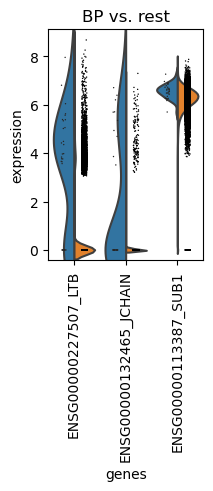

In [9]:
cite_rna_subset_adata = cite_rna_adata[cite_rna_adata.obs.day == 4]
sc.tl.rank_genes_groups(cite_rna_subset_adata, 'cell_type',method='t-test_overestim_var')
with plt.rc_context({'figure.figsize': (2, 3)}):
    sc.pl.rank_genes_groups_violin(
        cite_rna_subset_adata,
        n_genes=3,
        jitter=True,
        groups = ["BP"]
    )
# sc.pl.rank_genes_groups_violin(
#     cite_rna_subset_adata,
#     n_genes=3,
#     jitter=True
# )

In [21]:
volcano_gene_dict = {}
for celltype in np.unique(cite_rna_adata.obs.cell_type):
    for day in np.unique(cite_rna_adata.obs.day):
        label = f"{celltype}_day{day}"
        cumulative_subset_df = cumulative_filtered_df[(cumulative_filtered_df["cell_type"] == celltype) & (cumulative_filtered_df["day"] == day)]
        gene_list = []
        for idx,row in cumulative_subset_df.iterrows():
            gene_list.append(row["gene"])
        volcano_gene_dict[label] = gene_list

In [41]:


for celltype in np.unique(cite_rna_adata.obs.cell_type):
    print(f"Cell type: {celltype}")
    cite_rna_celltype_adata = cite_rna_adata[cite_rna_adata.obs.cell_type == celltype]
    
    print(f"  Computing non-zero genes with respect to {celltype} cells...")
    celltype_nonzero_indices = [sum(cite_rna_celltype_adata.X[:,j]) > 0 for j in range(cite_rna_celltype_adata.X.shape[1])]
    cite_rna_subset_adata = cite_rna_adata[:,celltype_nonzero_indices]
    
    print(f"  Iterating through days...")
    for day in np.unique(cite_rna_adata.obs.day):
        print(f"  Day: {day}")
        label = f"{celltype}_day{day}"
        
        subset_adata = cite_rna_subset_adata[cite_rna_subset_adata.obs.day == day]
        
        print("    Determining ranked genes...")
        sc.tl.rank_genes_groups(cite_rna_subset_adata,"cell_type",method='t-test_overestim_var')
        
        # Naive gene ranking
        print("    Naive gene ranking violin plot")
        with plt.rc_context({'figure.figsize': (2, 3)}):
            sc.pl.rank_genes_groups_violin(
                subset_adata,
                n_genes=3,
                jitter=True,
                groups = [celltype],
                save=f"rna_rank_genes_groups_violin_{label}_naive.pdf"
            )
        
        print("    Volcano gene enrichment violin plot")
        with plt.rc_context({'figure.figsize': (2, 3)}):
            sc.pl.rank_genes_groups_violin(
                subset_adata,
                gene_names = volcano_gene_dict[label],
                jitter=True,
                groups = [celltype],
                save=f"rna_rank_genes_groups_violin_{label}_volcano.pdf"
            )


Cell type: BP
  Computing non-zero genes with respect to BP cells...
  Iterating through days...
  Day: 2
    Determining ranked genes...


/home/brett/envs/miniconda3/envs/py39R41/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


    Naive gene ranking violin plot


KeyError: 'rank_genes_groups'

In [ ]:
sc.tl.rank_genes_groups(subset_adata,"cell_type",method='t-test_overestim_var')

/home/brett/envs/miniconda3/envs/py39R41/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/home/brett/envs/miniconda3/envs/py39R41/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


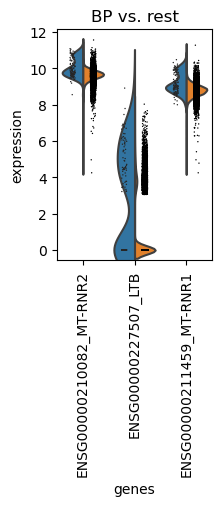

In [ ]:
with plt.rc_context({'figure.figsize': (2, 3)}):
    sc.pl.rank_genes_groups_violin(
        subset_adata,
        n_genes=3,
        jitter=True,
        groups = [celltype],
        save=f"rna_rank_genes_groups_violin_{label}_naive.pdf"
    )

In [2]:
# cite_rna_celltype_adata
# celltype_nonzero_indices = []
# for j in tqdm(range(cite_rna_celltype_adata.X.shape[1])):
#     celltype_nonzero_indices.append(sum(cite_rna_celltype_adata.X[:,j]) > 0)

# celltype_nonzero_indices = [sum(cite_rna_celltype_adata.X[:,j]) > 0 for j in range(cite_rna_celltype_adata.X.shape[1])]
# subset_adata = cite_rna_subset_adata[cite_rna_subset_adata.obs.day == day]

 # Partition-based graph abstraction (PAGA)

In [68]:
sc.tl.leiden(cite_rna_adata, key_added="leiden")

/home/brett/envs/miniconda3/envs/py39R41/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


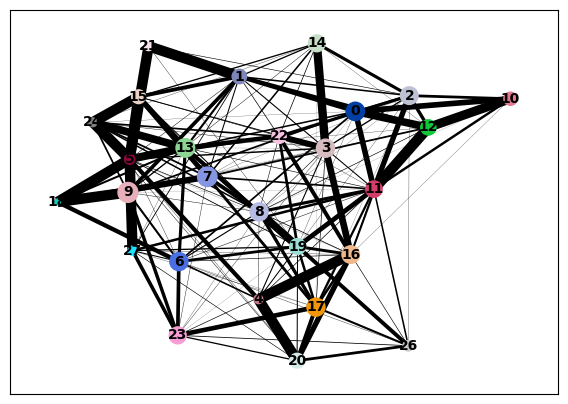

/home/brett/envs/miniconda3/envs/py39R41/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


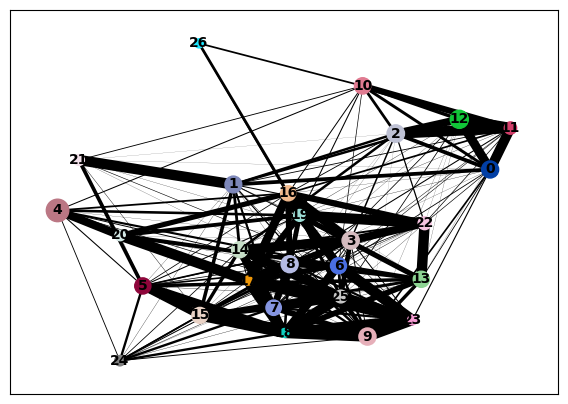

/home/brett/envs/miniconda3/envs/py39R41/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


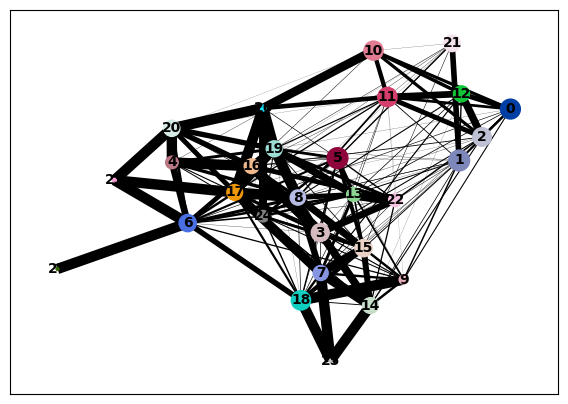

In [71]:
# sc.tl.paga(adata)
# sc.pl.paga(adata)

for day in cite_rna_adata.obs.day.unique():
    subset_adata = cite_rna_adata[cite_rna_adata.obs.day == day]
    sc.tl.paga(subset_adata,groups='leiden')
    sc.pl.paga(subset_adata)


/home/brett/envs/miniconda3/envs/py39R41/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


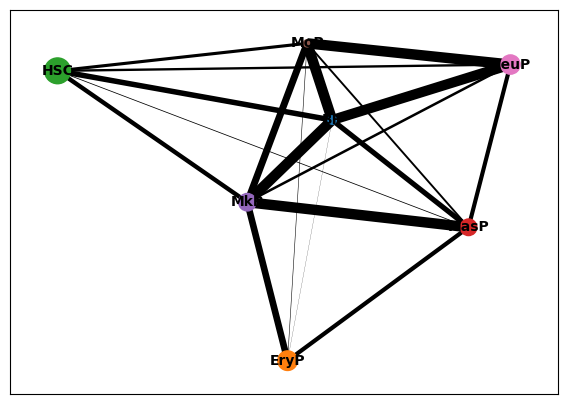

/home/brett/envs/miniconda3/envs/py39R41/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


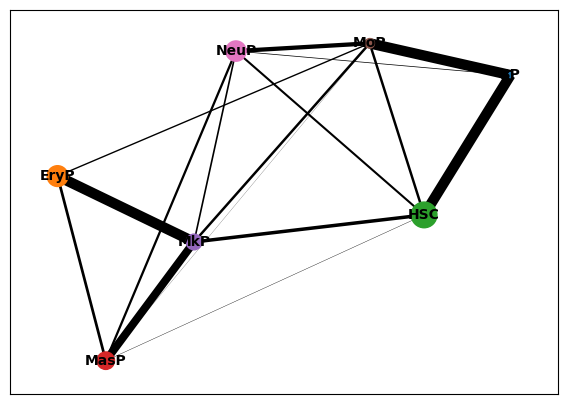

/home/brett/envs/miniconda3/envs/py39R41/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


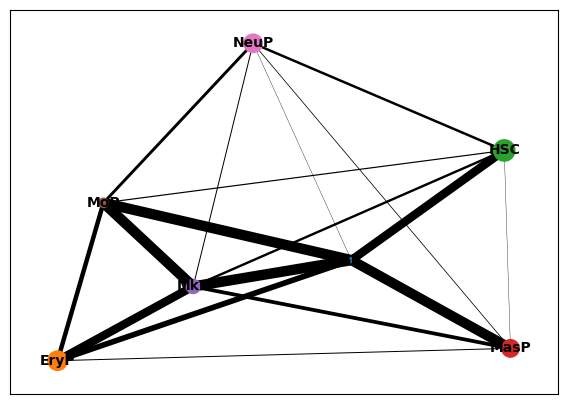

In [ ]:
for day in cite_rna_adata.obs.day.unique():
    subset_adata = cite_rna_adata[cite_rna_adata.obs.day == day]
    sc.tl.paga(subset_adata,groups='leiden')
    sc.pl.paga(subset_adata,)
    sc.tl.draw_graph(subset_adata,init_pos='paga')

# WaddingtonOT

In [14]:
FLE_COORDS_PATH      ='/path/to/work/TrajectoryInference/wot/dataset/data/fle_coords.txt'
FULL_DS_PATH         = '/path/to/work/TrajectoryInference/wot/dataset/data/ExprMatrix.h5ad'
VAR_DS_PATH          = '/path/to/work/TrajectoryInference/wot/dataset/data/ExprMatrix.var.genes.h5ad'
CELL_DAYS_PATH       = '/path/to/work/TrajectoryInference/wot/dataset/data/cell_days.txt'
GENE_SETS_PATH       = '/path/to/work/TrajectoryInference/wot/dataset/data/gene_sets.gmx'
GENE_SET_SCORES_PATH = '/path/to/work/TrajectoryInference/wot/dataset/data/gene_set_scores.csv'
CELL_SETS_PATH       = '/path/to/work/TrajectoryInference/wot/dataset/data/cell_sets.gmt'

In [15]:
coord_df = pd.read_csv(FLE_COORDS_PATH, index_col='id', sep='\t')
days_df = pd.read_csv(CELL_DAYS_PATH, index_col='id', sep='\t')
display(coord_df.head())
display(days_df.head())

,x,y
id,,
D0_Dox_C1_AAACCTGAGTATCTCG-1,15222.677,-4868.6310
D0_Dox_C1_AAACCTGCAAGCGAGT-1,14372.519,-5519.7607
D0_Dox_C1_AAACCTGGTCTCTTAT-1,14736.747,-5297.1333
D0_Dox_C1_AAACCTGTCAACACTG-1,14339.972,-5383.0703
D0_Dox_C1_AAACCTGTCGTTGCCT-1,15267.711,-5177.4090


,day
id,
D0_Dox_C1_AAACCTGAGTATCTCG-1,0.0
D0_Dox_C1_AAACCTGCAAGCGAGT-1,0.0
D0_Dox_C1_AAACCTGGTCTCTTAT-1,0.0
D0_Dox_C1_AAACCTGTCAACACTG-1,0.0
D0_Dox_C1_AAACCTGTCGTTGCCT-1,0.0


In [16]:
adata = wot.io.read_dataset(FULL_DS_PATH, obs=[days_df,coord_df])
adata

AnnData object with n_obs × n_vars = 251203 × 19089
    obs: 'day', 'x', 'y'
    var: 'highly_variable'

In [18]:
adata.obs.x

index
D0_Dox_C1_AAACCTGAGTATCTCG-1         15222.677
D0_Dox_C1_AAACCTGCAAGCGAGT-1         14372.519
D0_Dox_C1_AAACCTGGTCTCTTAT-1         14736.747
D0_Dox_C1_AAACCTGTCAACACTG-1         14339.972
D0_Dox_C1_AAACCTGTCGTTGCCT-1         15267.711
                                       ...    
DiPSC_serum_C2_TTTGTCAGTTCCCGAG-1    -4001.288
DiPSC_serum_C2_TTTGTCATCACAGGCC-1   -10134.673
DiPSC_serum_C2_TTTGTCATCCTTTACA-1    -9688.036
DiPSC_serum_C2_TTTGTCATCTTACCGC-1    -9630.546
DiPSC_serum_C2_TTTGTCATCTTCGGTC-1    -8609.475
Name: x, Length: 251203, dtype: float64

In [20]:
metadata_df = pd.read_csv(os.path.join(raw_dir,"metadata.csv"))
days_df     = metadata_df.loc[:,("cell_type","day")]

cite_rna_df = pd.read_hdf(os.path.join(raw_dir,"train_cite_inputs.h5"))
adata       = sc.AnnData(cite_rna_df)
sc.pp.pca(adata, n_comps=30)
sc.pp.neighbors(adata, n_neighbors=10)
sc.tl.umap(adata)
# # sc.tl.leiden(adata, key_added="leiden")

day_dict      = {}
celltype_dict = {}
for idx,row in metadata_df.iterrows():
    day_dict[     row[  'cell_id']] = row[      'day']
    celltype_dict[row[  'cell_id']] = row['cell_type']
    
adata.obs[      'day'] = [day_dict[     cell_id] for cell_id in adata.obs_names]
adata.obs['cell_type'] = [celltype_dict[cell_id] for cell_id in adata.obs_names]

In [49]:
adata.obs['x'] = adata.obsm['X_umap'][:,0]
adata.obs['y'] = adata.obsm['X_umap'][:,1]
coord_df = pd.DataFrame({
    # "id":adata.obs_names,
    "x":adata.obs.x,
    "y":adata.obs.y
})
coord_df

,x,y
cell_id,,
45006fe3e4c8,3.586253,5.437802
d02759a80ba2,2.412429,4.223039
c016c6b0efa5,9.697577,12.287061
ba7f733a4f75,7.670713,0.163133
fbcf2443ffb2,11.175719,7.660102
...,...,...
650ee456f0f3,1.313986,4.661602
cc506e7707f5,10.193421,9.313218
a91f1b55a520,10.694531,10.990438


In [23]:
unique_days = adata.obs.day.unique()

Text(0.5, 1.0, 'Day')

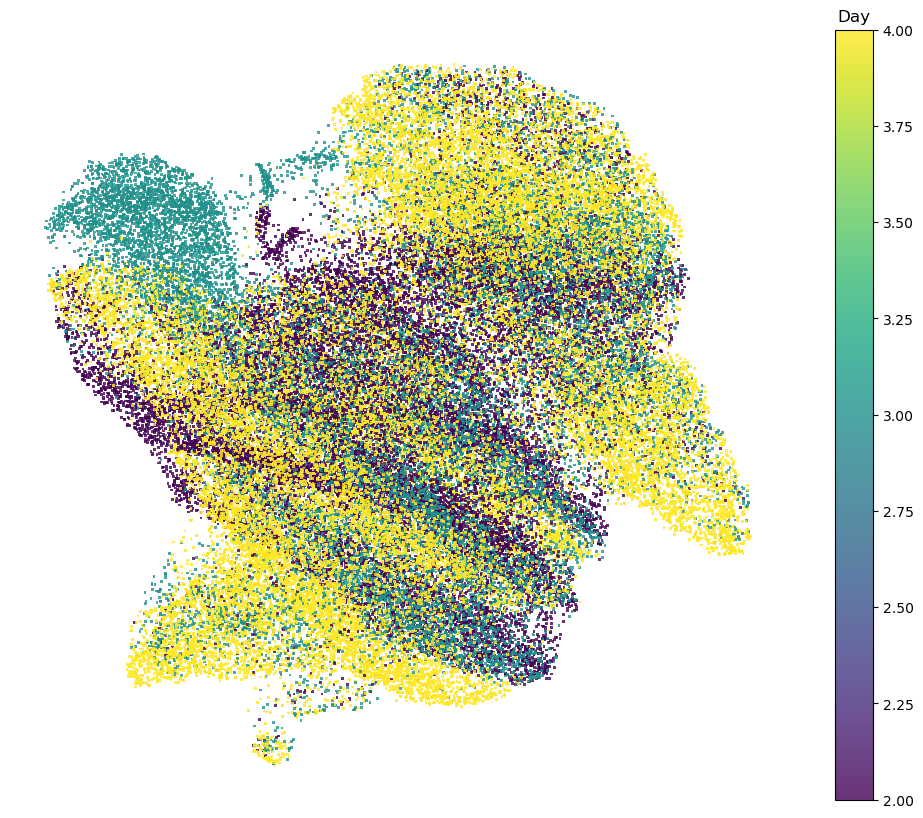

In [44]:
figure = plt.figure(figsize=(10, 8))
plt.axis('off')
plt.tight_layout()
plt.scatter(adata.obs['x'], adata.obs['y'],c=adata.obs['day'],
               s=4, marker=',', edgecolors='none', alpha=0.8)
cb = plt.colorbar()
cb.ax.set_title('Day')

In [51]:
# from matplotlib import animation
# from IPython.display import Video
# movie_file_name = 'cells_by_day.mov'
# coord_days_df = coord_df.join(days_df)
# figure = plt.figure(figsize=(10, 10))
# plt.axis('off')
# plt.tight_layout()

# def animate(i):
#     day_df = coord_days_df[coord_days_df['day']==unique_days[i]]
#     plt.suptitle('Day {}, {:,} cells'.format(unique_days[i], day_df.shape[0]), y=0.95)
#     plt.plot(coord_df['x'], coord_df['y'], ',', color='#f0f0f0', ms=4)
#     plt.plot(day_df['x'], day_df['y'], ',', color='black', ms=4)   
    
# anim = animation.FuncAnimation(figure, func=animate, frames=range(0, len(unique_days)), init_func=lambda **args:None, repeat=False, interval=400)
# anim.save(movie_file_name)
# plt.close(figure)
# Video(movie_file_name)

In [59]:
cell_sets = wot.io.read_sets(CELL_SETS_PATH)
np.sum(cell_sets.X,axis=0)

/home/brett/envs/miniconda3/envs/py39R41/lib/python3.9/site-packages/wot/io/io.py:304: FutureWarning: X.dtype being converted to np.float32 from int8. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=x, obs=obs, var=var)


array([56597., 38840.,  4452., 31241., 11711.,  9010.,  1024.,   632.,
         715.,  2864.,   987.,  1542.,  2152.], dtype=float32)

In [ ]:
# Maybe need to adjust parameters to get this block to finish
# ot_model = wot.ot.OTModel(adata,epsilon = 0.05, lambda1 = 1,lambda2 = 50) 
# tmap_annotated = ot_model.compute_transport_map(2,4)